# Exploratory Data Analysis for World Ocean Atlas 2018 Data

Mark Yamane, 2/25/2021

Research collaborators: Wes Barton, Max Miller, William Vierra

EDA and data visualization of dissolved oxygen data from the World Ocean Atlas 2018 dataset.

## Metadata

In [1]:
# import packages
from netCDF4 import Dataset
import numpy as np

In [2]:
# load dataset
fpath = 'data/'
filename = 'woa18_all_o05_01.nc'
ds = Dataset(fpath + filename)

In [3]:
# keys to access data
print(ds.variables.keys())

dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 'o_an', 'o_mn', 'o_dd', 'o_sd', 'o_se', 'o_oa', 'o_ma', 'o_gp'])


In [4]:
print(ds.variables['lat'])
print('first value:\t', ds.variables['lat'][0])
print('last value:\t', ds.variables['lat'][-1])

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
first value:	 -89.5
last value:	 89.5


In [5]:
print(ds.variables['lon'])
print('first value:\t', ds.variables['lon'][0])
print('last value:\t', ds.variables['lon'][-1])

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used
first value:	 -179.5
last value:	 179.5


In [6]:
print(ds.variables['depth'])
print('first value:\t', ds.variables['depth'][0])
print('last value:\t', ds.variables['depth'][-1])

<class 'netCDF4._netCDF4.Variable'>
float32 depth(depth)
    standard_name: depth
    bounds: depth_bnds
    positive: down
    units: meters
    axis: Z
unlimited dimensions: 
current shape = (57,)
filling on, default _FillValue of 9.969209968386869e+36 used
first value:	 0.0
last value:	 1500.0


In [7]:
print(ds.variables['o_an'])

<class 'netCDF4._netCDF4.Variable'>
float32 o_an(time, depth, lat, lon)
    standard_name: mole_concentration_of_dissolved_molecular_oxygen_in_sea_water
    long_name: Objectively analyzed mean fields for mole_concentration_of_dissolved_molecular_oxygen_in_sea_water at standard depth levels.
    coordinates: time lat lon depth
    cell_methods: area: mean depth: mean time: mean within years time: mean over years
    grid_mapping: crs
    units: micromoles_per_kilogram
    _FillValue: 9.96921e+36
unlimited dimensions: 
current shape = (1, 57, 180, 360)
filling on


## Data Visualization

### Surface Map at 0m

In [8]:
# import packages
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# load dataset
fpath = 'data/'
filename = 'woa18_all_o01_01.nc'
ds = Dataset(fpath+filename)

In [10]:
# pull data
lons = ds.variables['lon'][:]    # longitudes (360,)
lats = ds.variables['lat'][:]    # latitudes (180,)
dO = ds.variables['o_an'][0][0][:][:]

# create full grids for each dimension
tempLat = []
tempLon = []

nLons = len(lons)
for lat in lats:
    tempLat.append(np.full(nLons, lat))
    tempLon.append(lons)

# cast to numpy arrays for easier handling
lats = np.array(tempLat)
lons = np.array(tempLon)
print(lats.shape, '\tlats shape')
print(lons.shape, '\tlons shape')
print(dO.shape, '\tdO shape')

(180, 360) 	lats shape
(180, 360) 	lons shape
(180, 360) 	dO shape


In [50]:
dO[0]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, 259.9876403808594,
                   248.88551330566406, 239.5609588623047,
                   231.31561279296875, 224.5319061279297,
                   219.792236328125, 217.26409912109375,
                   216.00625610351562, 216.49468994140625,
                   217.9256591796875, 218.90574645996094,
                   219.5370330810547, 219.8887176513672,
                   220.04632568359375, 220.21881103515625,
                   220.72235107421875, 221.7078094482422,
                   223.02622985839844, 224.32386779785156,
                   225.26182556152344, 225.70706176757812,
                   225.84864807128906, 226.09637451171875,
                   226.71963500976562, 227.5399169921875,
                   227.9683074951172, 227.48089599609375,
                   226.0254669189453, 224.12738037109375,
                   222.5617980957031

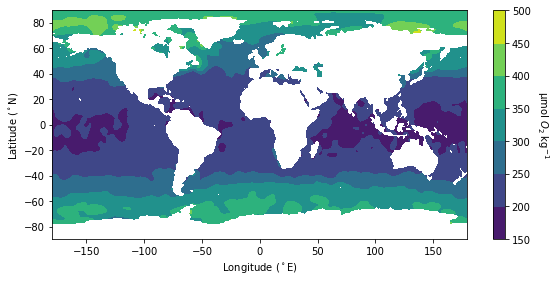

In [11]:
fig, ax = plt.subplots(figsize=(9.3, 4.2))  # create figure
dO_map = plt.contourf(lons, lats, dO)       # create contour plot

# labels
cbar = plt.colorbar(dO_map)  # add colorbar
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('Longitude ($^\circ$E)')
cbar.set_label('\u03BCmol $O_2$ kg$^{-1}$', rotation=270, labelpad=20)
plt.show()

### Longitudinal Slice

In [12]:
# import packages
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt

In [13]:
# load dataset
fpath = 'data/'
filename = 'woa18_all_o01_01.nc'
ds = Dataset(fpath+filename)

In [14]:
# pull data
lons = ds.variables['lon'][:]    # longitudes (360,)
lats = ds.variables['lat'][:]    # latitudes (180,)
deps = ds.variables['depth'][:]  # depths (57,)
dO = ds.variables['o_an'][0][:][:][:]

# create full grids for each dimension
tempLat = []
tempLon = []
tempDep = []

nLons = len(lons)
for lat in lats:
    tempLat.append(np.full(nLons, lat))
    tempLon.append(lons)
    tempDep.append(deps)

# cast to numpy arrays for easier handling
lats = np.array(tempLat)
lons = np.array(tempLon)
deps = np.array(tempDep)
print(lats.shape, '\tlats shape')
print(lons.shape, '\tlons shape')
print(deps.shape, '\tdeps shape (latitudinal slice)')

(180, 360) 	lats shape
(180, 360) 	lons shape
(180, 57) 	deps shape (latitudinal slice)


In [15]:
# set index of longitude to perform the slice on
i_lon = 0

In [16]:
# create full grid for a latitudinal slice w/ depth
latVert = []
for dep in deps[0,:]:
    latVert.append(lats[:,i_lon])

In [17]:
# format data for plot
latVert = np.array(latVert)
deps = np.transpose(deps)
dO_slice = dO[:, :, i_lon]

# verify all data have the same shape
print(latVert.shape, '\tlatVert shape')
print(deps.shape, '\tdeps shape')
print(dO_slice.shape, '\tdO_slice shape')

(57, 180) 	latVert shape
(57, 180) 	deps shape
(57, 180) 	dO_slice shape


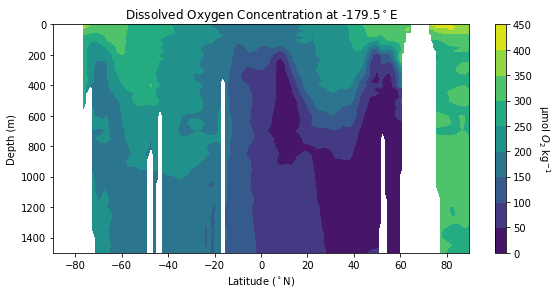

In [18]:
fig, ax = plt.subplots(figsize=(9.3, 4.2))      # create figure
dO_map = plt.contourf(latVert, deps, dO_slice)  # create contour plot
cbar = plt.colorbar(dO_map)  # add colorbar
plt.gca().invert_yaxis()     # make depth go down

# labels
plt.title('Dissolved Oxygen Concentration at ' + str(lons[0,i_lon]) + '$^\circ$E')
plt.ylabel('Depth (m)')
plt.xlabel('Latitude ($^\circ$N)')
cbar.set_label('\u03BCmol $O_2$ kg$^{-1}$', rotation=270, labelpad=20)
plt.show()

### Latitudinal Slice

In [19]:
# import packages
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# load dataset
fpath = 'data/'
filename = 'woa18_all_o01_01.nc'
ds = Dataset(fpath+filename)

In [21]:
# pull data
lons = ds.variables['lon'][:]
lats = ds.variables['lat'][:]
deps = ds.variables['depth'][:]
dO = ds.variables['o_an'][0][:][:][:]

# create full grids for each dimension
tempLat = []
tempLon = []
tempDep = []

nLons = len(lons)
for lat in lats:
    tempLat.append(np.full(nLons, lat))
    tempLon.append(lons)
for lon in lons:
    tempDep.append(deps)
    
# cast to numpy arrays for easier handling
lats = np.array(tempLat)
lons = np.array(tempLon)
deps = np.array(tempDep)
print(lats.shape, '\tlats shape')
print(lons.shape, '\tlons shape')
print(deps.shape, '\tdeps shape (latitudinal slice)')

(180, 360) 	lats shape
(180, 360) 	lons shape
(360, 57) 	deps shape (latitudinal slice)


In [22]:
# set index of latitude to perform the slice on
i_lat = 110

In [23]:
# create full grid for a longitudinal slice w/ depth
lonVert = []
for dep in deps[0,:]:
    lonVert.append(lons[i_lat,:])

In [24]:
# format data for plot
lonVert = np.array(lonVert)
deps = np.transpose(deps)
dO_slice = dO[:, i_lat, :]

# verify all data have the same shape
print(lonVert.shape, '\tlatVert shape')
print(deps.shape, '\tdeps shape')
print(dO_slice.shape, '\tdO_slice shape')

(57, 360) 	latVert shape
(57, 360) 	deps shape
(57, 360) 	dO_slice shape


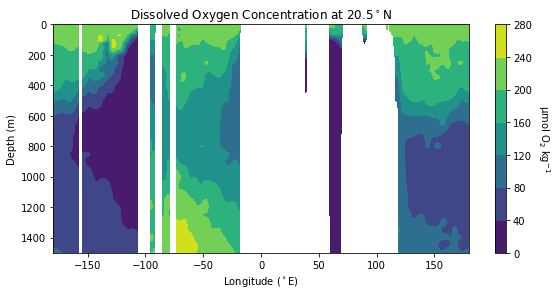

In [25]:
fig, ax = plt.subplots(figsize=(9.3, 4.2))      # create figure
dO_map = plt.contourf(lonVert, deps, dO_slice)  # create contour plot

cbar = plt.colorbar(dO_map)  # add colorbar
plt.gca().invert_yaxis()     # make depth go down
plt.title('Dissolved Oxygen Concentration at ' + str(lats[i_lat,0]) + '$^\circ$N')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude ($^\circ$E)')
cbar.set_label('\u03BCmol O$_2$ kg$^{-1}$', rotation=270, labelpad=20)
plt.show()

### Center at Pacific Ocean

Look at longitudes from 0 to 360?

In [26]:
print(lonVert.shape)

(57, 360)


In [27]:
print(lonVert[0])

[-179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 -172.5 -171.5 -170.5
 -169.5 -168.5 -167.5 -166.5 -165.5 -164.5 -163.5 -162.5 -161.5 -160.5
 -159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 -119.5 -118.5 -117.5 -116.5 -115.5 -114.5 -113.5 -112.5 -111.5 -110.5
 -109.5 -108.5 -107.5 -106.5 -105.5 -104.5 -103.5 -102.5 -101.5 -100.5
  -99.5  -98.5  -97.5  -96.5  -95.5  -94.5  -93.5  -92.5  -91.5  -90.5
  -89.5  -88.5  -87.5  -86.5  -85.5  -84.5  -83.5  -82.5  -81.5  -80.5
  -79.5  -78.5  -77.5  -76.5  -75.5  -74.5  -73.5  -72.5  -71.5  -70.5
  -69.5  -68.5  -67.5  -66.5  -65.5  -64.5  -63.5  -62.5  -61.5  -60.5
  -59.5  -58.5  -57.5  -56.5  -55.5  -54.5  -53.5  -52.5  -51.5  -50.5
  -49.5  -48.5  -47.5  -46.5  -45.5  -44.5  -43.5  -42.5  -41.5  -40.5
  -39.

In [28]:
for i in range(len(lonVert)):
    for j in range(len(lonVert[0,:])):
        if lonVert[i,j] < 0:
            lonVert[i,j] += 360
print(lonVert[0])

[180.5 181.5 182.5 183.5 184.5 185.5 186.5 187.5 188.5 189.5 190.5 191.5
 192.5 193.5 194.5 195.5 196.5 197.5 198.5 199.5 200.5 201.5 202.5 203.5
 204.5 205.5 206.5 207.5 208.5 209.5 210.5 211.5 212.5 213.5 214.5 215.5
 216.5 217.5 218.5 219.5 220.5 221.5 222.5 223.5 224.5 225.5 226.5 227.5
 228.5 229.5 230.5 231.5 232.5 233.5 234.5 235.5 236.5 237.5 238.5 239.5
 240.5 241.5 242.5 243.5 244.5 245.5 246.5 247.5 248.5 249.5 250.5 251.5
 252.5 253.5 254.5 255.5 256.5 257.5 258.5 259.5 260.5 261.5 262.5 263.5
 264.5 265.5 266.5 267.5 268.5 269.5 270.5 271.5 272.5 273.5 274.5 275.5
 276.5 277.5 278.5 279.5 280.5 281.5 282.5 283.5 284.5 285.5 286.5 287.5
 288.5 289.5 290.5 291.5 292.5 293.5 294.5 295.5 296.5 297.5 298.5 299.5
 300.5 301.5 302.5 303.5 304.5 305.5 306.5 307.5 308.5 309.5 310.5 311.5
 312.5 313.5 314.5 315.5 316.5 317.5 318.5 319.5 320.5 321.5 322.5 323.5
 324.5 325.5 326.5 327.5 328.5 329.5 330.5 331.5 332.5 333.5 334.5 335.5
 336.5 337.5 338.5 339.5 340.5 341.5 342.5 343.5 34

In [29]:
# sort
temp = 0
for i in range(len(lonVert)):
    for j in range(180):
        temp = lonVert[i, j+180]
        lonVert[i, j+180] = lonVert[i,j]
        lonVert[i, j] = temp
        temp = dO_slice[i, j+180]
        dO_slice[i, j+180] = dO_slice[i,j]
        dO_slice[i,j] = temp
print(lonVert[0])

[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5
 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5
 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5 155.5
 156.5 157.5 158.5 159.5 160.5 161.5 162.5 163.5 16

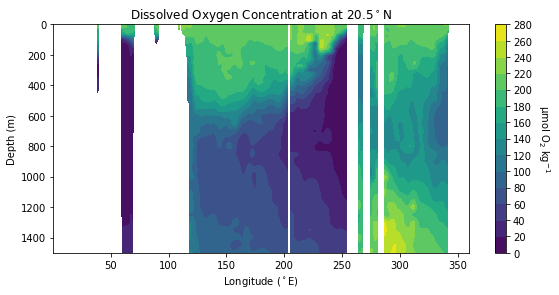

In [31]:
breaks = np.linspace(0, 280, 15)

fig, ax = plt.subplots(figsize=(9.3, 4.2))      # create figure
dO_map = plt.contourf(lonVert, deps, dO_slice, breaks)  # create contour plot

cbar = plt.colorbar(dO_map, ticks=breaks)  # add colorbar
plt.gca().invert_yaxis()     # make depth go down
plt.title('Dissolved Oxygen Concentration at ' + str(lats[i_lat,0]) + '$^\circ$N')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude ($^\circ$E)')
cbar.set_label('\u03BCmol O$_2$ kg$^{-1}$', rotation=270, labelpad=20)
plt.show()

In [44]:
# mask to keep only lons of the Pacific
pacific_mask = (lonVert[0] > 100) & (lonVert[0] < 260)
new_lon = []
new_dep = []
new_dO = []
for i in range(len(lonVert)):
    new_lon.append(lonVert[i][pacific_mask])
    new_dep.append(deps[i][pacific_mask])
    new_dO.append(dO_slice[i][pacific_mask])
print(pacific_mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

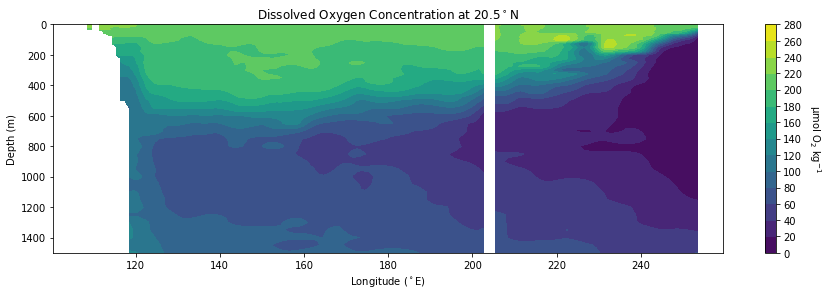

In [46]:
breaks = np.linspace(0, 280, 15)

fig, ax = plt.subplots(figsize=(15, 4.2))      # create figure

dO_map = plt.contourf(new_lon, new_dep, new_dO, breaks)  # create contour plot

cbar = plt.colorbar(dO_map, ticks=breaks)  # add colorbar
plt.gca().invert_yaxis()     # make depth go down
plt.title('Dissolved Oxygen Concentration at ' + str(lats[i_lat,0]) + '$^\circ$N')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude ($^\circ$E)')
cbar.set_label('\u03BCmol O$_2$ kg$^{-1}$', rotation=270, labelpad=20)
plt.show()